In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from sklearn.metrics import confusion_matrix

from composition.analysis.load_sim import load_sim
from composition.analysis.preprocessing import get_train_test_sets
from composition.analysis.features import get_training_features
from composition.analysis.pipelines import get_pipeline

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
sns.set_palette('muted')
sns.set_color_codes()

In [3]:
df, cut_dict = load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'max_charge_frac', 'reco_containment',
                     'min_energy', 'max_energy']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

feature_list = get_training_features()
X_train, X_test, y_train, y_test, le = get_train_test_sets(df, feature_list)

print('events = ' + str(y_train.shape[0]))

/home/jbourbeau/composition/analysis/load_sim.py:40: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:41: RuntimeWarning: divide by zero encountered in log10
  cut_dict['max_energy'] = (np.log10(df['reco_energy']) < 8.0)
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:58: RuntimeWarning: invalid value encountered in log10
  df['InIce_log_charge'] = np.nan_to_num(np.log10(df['InIce_charge']))


events = 76442


In [4]:
pipeline = get_pipeline('KN')

In [12]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)/len(y_pred)
print(confmat)
print(le.transform(['P','Fe']))

[[ 0.34272458  0.15039223]
 [ 0.11208449  0.39479869]]
[1 0]


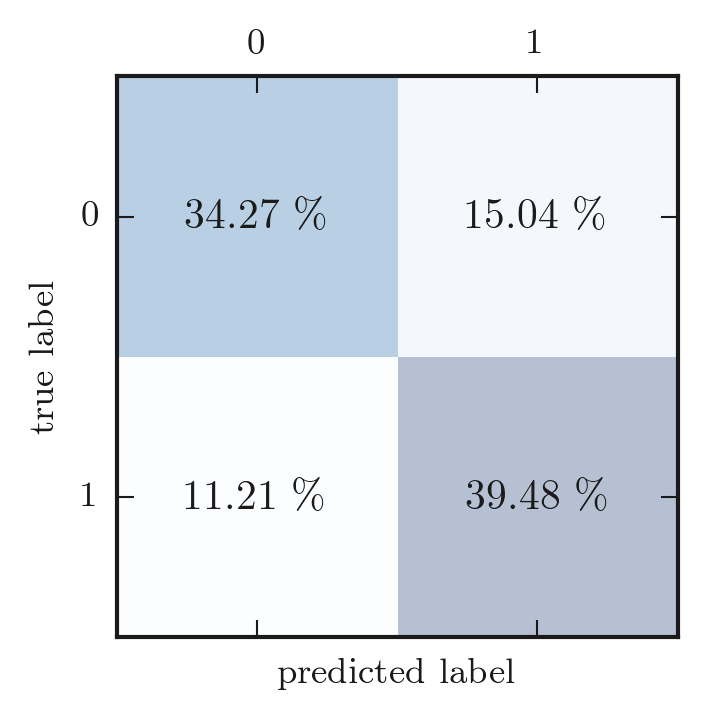

In [17]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s='{:0.2f} \%'.format(100*confmat[i, j]), va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()